In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import keras
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import numpy as np
import itertools
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

In [3]:
cancer=pd.read_csv('DomainCorrect.csv')

In [4]:
cancer

,App,Mins,SpG,KeyP,Rating,Overall rating,BP,CROSSING,FINISHING,ACCELERATION,SPRINT SPEED,REACTIONS,POSITIONING,CLASS
0,0.745763,0.716806,0.527027,0.404762,0.540541,0.809524,0.000000,0.735294,0.916667,0.833333,0.791045,0.921569,0.915254,0
1,0.457627,0.479418,0.527027,0.428571,0.530405,0.761905,0.333333,0.838235,0.888889,0.750000,0.716418,0.803922,0.881356,0
2,0.508475,0.516249,0.378378,0.690476,0.527027,0.809524,0.333333,0.838235,0.805556,0.680556,0.641791,0.843137,0.898305,1
3,0.830508,0.796657,0.567568,0.476190,0.527027,0.809524,0.000000,0.764706,0.916667,0.777778,0.776119,0.745098,0.915254,0
4,0.338983,0.434850,0.527027,0.261905,0.523649,0.642857,0.000000,0.558824,0.791667,0.722222,0.686567,0.686275,0.796610,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5373,0.389831,0.481275,0.391892,0.452381,0.361486,0.619048,0.333333,0.691176,0.694444,0.694444,0.686567,0.549020,0.610169,2
5374,0.254237,0.246982,0.108108,0.214286,0.250000,0.428571,0.333333,0.588235,0.513889,0.541667,0.477612,0.392157,0.508475,2
5375,0.118644,0.213247,0.229730,0.119048,0.209459,0.476190,0.000000,0.338235,0.652778,0.541667,0.507463,0.450980,0.610169,2
5376,0.169492,0.193439,0.162162,0.309524,0.148649,0.595238,0.333333,0.764706,0.638889,0.597222,0.656716,0.490196,0.627119,2


In [5]:
x=cancer.iloc[:,0:13]
y=cancer.iloc[:,13]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
X_test

,App,Mins,SpG,KeyP,Rating,Overall rating,BP,CROSSING,FINISHING,ACCELERATION,SPRINT SPEED,REACTIONS,POSITIONING
2899,0.711864,0.647478,0.297297,0.428571,0.347973,0.690476,0.333333,0.735294,0.638889,0.805556,0.791045,0.647059,0.711864
2888,0.898305,0.878056,0.648649,0.285714,0.628378,0.738095,0.000000,0.544118,0.847222,0.597222,0.522388,0.686275,0.898305
4765,0.491525,0.503250,0.067568,0.309524,0.381757,0.642857,1.000000,0.823529,0.458333,0.875000,0.865672,0.647059,0.677966
4717,0.186441,0.207057,0.108108,0.119048,0.094595,0.428571,1.000000,0.705882,0.444444,0.750000,0.731343,0.333333,0.525424
4091,0.711864,0.599195,0.324324,0.214286,0.226351,0.547619,0.000000,0.470588,0.736111,0.875000,0.791045,0.568627,0.661017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2826,0.677966,0.466110,0.243243,0.357143,0.209459,0.595238,0.333333,0.647059,0.541667,0.736111,0.716418,0.568627,0.644068
639,0.711864,0.603219,0.189189,0.190476,0.256757,0.523810,0.000000,0.588235,0.736111,0.861111,0.820896,0.431373,0.677966
2631,0.152542,0.192510,0.216216,0.285714,0.273649,0.523810,0.000000,0.544118,0.722222,0.652778,0.567164,0.411765,0.593220
2953,0.525424,0.480656,0.175676,0.190476,0.216216,0.595238,1.000000,0.764706,0.666667,0.722222,0.701493,0.607843,0.661017


In [12]:
X_test.to_csv('C:/Users/user/Desktop/Code/xtest.csv')

In [30]:
y_test.to_csv('ytestnew.csv')

In [14]:
oversample = SMOTE(random_state=42)
X_r,y_r=oversample.fit_resample(X_train,y_train)

In [15]:
from collections import Counter
counter=Counter(y_r)
for k,v in counter.items():
    dist=v/len(y_r)*100
    print(f"class={k},n={v},({dist}%)")

class=1,n=2982,(33.33333333333333%)
class=0,n=2982,(33.33333333333333%)
class=2,n=2982,(33.33333333333333%)


In [16]:
print(dist)

33.33333333333333


In [17]:
# Number of trees in random forest
n_estimators = [1, 21, 41, 61, 81, 101, 121, 141, 161,]
# Number of features to consider at every split
# Maximum number of levels in tree
max_depth = [1, 21, 41, 61, 81, 101, 121, 141, 161, 181, 201]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


In [18]:
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth
               }
               
            

In [19]:
pprint(random_grid)

{'max_depth': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181, 201, None],
 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161]}


In [20]:
rf = RandomForestClassifier()
rf_r = RandomizedSearchCV(estimator = rf, param_distributions = random_grid)
# Fit the random search model
rf_r.fit(X_r, y_r)


RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [1, 21, 41, 61, 81, 101,
                                                      121, 141, 161, 181, 201,
                                                      None],
                                        'n_estimators': [1, 21, 41, 61, 81, 101,
                                                         121, 141, 161]})

In [16]:
print(rf_r.best_estimator_)

RandomForestClassifier(max_depth=41, n_estimators=41)


In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy of RandomForest  classifier on training set: 1.00
Accuracy of RandomForest classifier on test set: 0.87
accuracy:   0.874
Confusion matrix


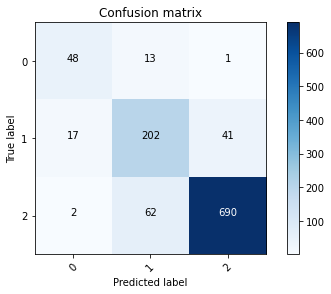

In [22]:
pred = rf_r.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print('Accuracy of RandomForest  classifier on training set: {:.2f}'
     .format(rf_r.score(X_r, y_r)))
print('Accuracy of RandomForest classifier on test set: {:.2f}'
     .format(rf_r.score(X_test, y_test)))
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['0', '1','2'])

In [24]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74        62
           1       0.73      0.78      0.75       260
           2       0.94      0.92      0.93       754

    accuracy                           0.87      1076
   macro avg       0.80      0.82      0.81      1076
weighted avg       0.88      0.87      0.88      1076



In [25]:
print(pred)

[1 0 2 ... 2 2 2]


In [26]:
pred

array([1, 0, 2, ..., 2, 2, 2], dtype=int64)

In [28]:
import numpy as np
import pandas as pd
prediction = pd.DataFrame(pred, columns=['pred']).to_csv('prediction.csv')

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [44]:
rff = RandomForestClassifier()

In [45]:
rff.fit(X_r,y_r)

RandomForestClassifier()

Accuracy of LogisticRegression  classifier on training set: 1.00
Accuracy of LogisticRegression classifier on test set: 0.87
accuracy:   0.868
Confusion matrix, without normalization


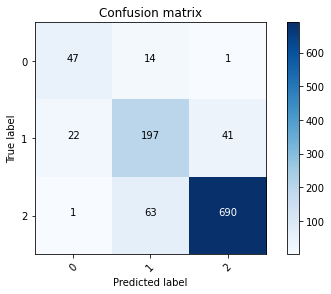

In [46]:
predi= rff.predict(X_test)
score = metrics.accuracy_score(y_test, predi)
print('Accuracy of LogisticRegression  classifier on training set: {:.2f}'
     .format(rff.score(X_r, y_r)))
print('Accuracy of LogisticRegression classifier on test set: {:.2f}'
     .format(rff.score(X_test, y_test)))
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, predi)
plot_confusion_matrix(cm, classes=['0', '1','2'])

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predi))

              precision    recall  f1-score   support

           0       0.67      0.76      0.71        62
           1       0.72      0.76      0.74       260
           2       0.94      0.92      0.93       754

    accuracy                           0.87      1076
   macro avg       0.78      0.81      0.79      1076
weighted avg       0.87      0.87      0.87      1076

